In [1]:
import glob
import os
import pandas as pd

# to read a set of files we create a list of file names with path 
path = r'../data/solar-panel-csv'
all_files = glob.glob(os.path.join(path, "*.csv"))

# using a generator we iterate through the files and concatenate the data frames
df_generator = (pd.read_csv(file, sep="|") for file in all_files)
df = pd.concat(df_generator, sort="False", ignore_index=True)

# in case we need it later
df_orig = df
df

,Ambient Temp.(°C),Azimuth,Battery Voltage(V),Current(A),Date,Elevation,Feel-like temperature,Global radiation(W/m^2),Ground pressure(hPa),Humidity WetterOnline(RH),...,Temperature sensor(°C),Time,Voltage(V),Weather condition,Wind gust(Beaufort),Wind gust(km/h),Wind's cardinal direction,Wind's direction(°),Wind's speed(Beaufort),Wind's speed(m/s)
0,25.18,NaN,12.87,0.0,2019-08-12,NaN,NaN,0,1012.2,85,...,29.7,00:00:00,0.45,mdr1__,NaN,NaN,NaN,NaN,NaN,1.4
1,25.19,NaN,12.88,0.0,2019-08-12,NaN,NaN,0,1012.2,85,...,29.7,00:01:00,0.18,mdr1__,NaN,NaN,NaN,NaN,NaN,1.4
2,25.18,NaN,12.88,0.0,2019-08-12,NaN,NaN,0,1012.2,85,...,29.7,00:02:00,0.18,mdr1__,NaN,NaN,NaN,NaN,NaN,1.4
3,25.16,NaN,12.87,0.0,2019-08-12,NaN,NaN,0,1012.2,85,...,29.7,00:03:00,0.17,mdr1__,NaN,NaN,NaN,NaN,NaN,1.4
4,25.17,NaN,12.87,0.0,2019-08-12,NaN,NaN,0,1012.2,85,...,29.7,00:04:00,0.18,mdr1__,NaN,NaN,NaN,NaN,NaN,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107235,23.72,NaN,12.85,0.0,2019-08-23,NaN,18.9,0,1022.0,75,...,28.1,23:55:00,0.15,md____,3.0,19.0,no,65.0,2.0,2.7
107236,23.73,NaN,12.86,0.0,2019-08-23,NaN,18.9,0,1022.0,75,...,28.1,23:56:00,0.18,md____,3.0,19.0,no,65.0,2.0,2.7
107237,23.73,NaN,12.85,0.0,2019-08-23,NaN,18.9,0,1022.0,75,...,28.1,23:57:00,0.16,md____,3.0,19.0,no,65.0,2.0,2.7
107238,23.70,NaN,12.85,0.0,2019-08-23,NaN,18.9,0,1022.0,75,...,28.1,23:58:00,0.16,md____,3.0,19.0,no,65.0,2.0,2.7


In [2]:
# useful information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107240 entries, 0 to 107239
Data columns (total 26 columns):
Ambient Temp.(°C)               107240 non-null float64
Azimuth                         41202 non-null float64
Battery Voltage(V)              107240 non-null float64
Current(A)                      107240 non-null float64
Date                            107240 non-null object
Elevation                       41202 non-null float64
Feel-like temperature           86104 non-null float64
Global radiation(W/m^2)         107240 non-null int64
Ground pressure(hPa)            107240 non-null float64
Humidity WetterOnline(RH)       107240 non-null int64
Humidity sensor(RH)             107240 non-null float64
Light Int.(lux)                 107240 non-null float64
Power(W)                        107240 non-null float64
Rainfall's possibility(%)       107240 non-null int64
Rainfall(mm)                    107240 non-null float64
Temperature WetterOnline(°C)    107240 non-null float64
Tem

In [3]:
# 26 attributes are too long, so we take 13
df.iloc[:, 0:13].describe()

,Ambient Temp.(°C),Azimuth,Battery Voltage(V),Current(A),Elevation,Feel-like temperature,Global radiation(W/m^2),Ground pressure(hPa),Humidity WetterOnline(RH),Humidity sensor(RH),Light Int.(lux),Power(W)
count,107240.000000,41202.0,107240.000000,107240.000000,41202.000000,86104.000000,107240.000000,107240.000000,107240.000000,107240.000000,107240.000000,107240.000000
mean,22.525071,0.0,13.141408,0.133661,4.358812,14.806648,174.843855,1017.181570,76.358308,38.337556,356.550417,2.921128
std,1.604174,0.0,0.502302,0.305894,4.809059,5.990809,246.756432,5.194293,16.157424,4.978333,690.416751,7.276528
min,0.000000,0.0,0.000000,0.000000,-0.830000,0.000000,0.000000,1004.300000,25.000000,0.000000,-0.171000,0.000000
25%,21.300000,0.0,12.820000,0.000000,0.000000,10.900000,0.000000,1013.900000,65.000000,35.200000,0.171000,0.000000
50%,22.690000,0.0,12.960000,0.030000,0.000000,14.700000,30.000000,1016.900000,80.000000,38.600000,0.227000,0.510000
75%,23.870000,0.0,13.280000,0.140000,9.990000,18.300000,275.000000,1019.500000,90.000000,42.200000,193.358000,2.790000
max,25.670000,0.0,14.960000,3.070000,9.990000,40.600000,940.000000,1032.900000,100.000000,87.800000,3005.659000,91.640000


In [4]:
# and the other 13
df.iloc[:, 13:].describe()

,Rainfall's possibility(%),Rainfall(mm),Temperature WetterOnline(°C),Temperature sensor(°C),Voltage(V),Wind gust(Beaufort),Wind gust(km/h),Wind's direction(°),Wind's speed(Beaufort),Wind's speed(m/s)
count,107240.000000,107240.000000,107240.000000,107240.000000,107240.000000,86104.000000,86104.000000,86104.000000,86104.000000,107240.000000
mean,34.069377,0.310021,15.839467,27.284007,12.891362,3.522752,20.592667,197.936972,2.039325,2.476816
std,23.462638,1.501855,5.527278,34.437643,14.404728,1.225707,10.735570,85.266723,0.814794,1.403207
min,5.000000,0.000000,1.700000,0.000000,0.000000,2.000000,6.000000,0.000000,1.000000,0.300000
25%,10.000000,0.000000,11.900000,26.000000,0.180000,3.000000,13.000000,130.000000,2.000000,1.500000
50%,30.000000,0.000000,15.600000,27.100000,13.810000,3.000000,17.000000,220.000000,2.000000,2.100000
75%,45.000000,0.000000,19.400000,28.200000,14.550000,4.000000,25.000000,250.000000,2.000000,3.000000
max,95.000000,41.000000,34.300000,6547.600000,47.210000,8.000000,70.000000,360.000000,5.000000,10.000000


In [5]:
# some temperature values frok the sensor look strange, so we compare them with WetterOnline
df[df["Temperature sensor(°C)"] > 40].loc[:, ["Date", "Time", "Temperature WetterOnline(°C)", "Temperature sensor(°C)"]]

,Date,Time,Temperature WetterOnline(°C),Temperature sensor(°C)
6415,2019-08-05,18:25:00,26.0,42.3
12753,2019-08-29,04:03:00,18.7,72.7
18116,2019-08-03,21:22:00,17.8,71.1
46041,2019-10-03,23:58:00,5.5,6529.4
55716,2019-09-21,02:54:00,5.9,6511.6
75717,2019-09-03,22:11:00,13.9,6547.6
89179,2019-08-26,10:54:00,21.4,51.6
94668,2019-08-31,06:25:00,14.6,68.4
94734,2019-08-31,07:31:00,14.7,66.3
94829,2019-08-31,09:06:00,16.6,52.8


In [6]:
import numpy as np

# we fix them by setting them nan and then using forward fill
df.loc[df["Temperature sensor(°C)"] > 40, ["Temperature sensor(°C)"]] = np.nan
df["Temperature sensor(°C)"] = df["Temperature sensor(°C)"].fillna(method="ffill")

In [7]:
# plotting and selecting is easier if we have a DateTime index, so we build one
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index(["DateTime"], inplace=True)
# and drop the original columns
df.drop(columns=["Date", "Time"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107240 entries, 2019-08-12 00:00:00 to 2019-08-23 23:59:00
Data columns (total 24 columns):
Ambient Temp.(°C)               107240 non-null float64
Azimuth                         41202 non-null float64
Battery Voltage(V)              107240 non-null float64
Current(A)                      107240 non-null float64
Elevation                       41202 non-null float64
Feel-like temperature           86104 non-null float64
Global radiation(W/m^2)         107240 non-null int64
Ground pressure(hPa)            107240 non-null float64
Humidity WetterOnline(RH)       107240 non-null int64
Humidity sensor(RH)             107240 non-null float64
Light Int.(lux)                 107240 non-null float64
Power(W)                        107240 non-null float64
Rainfall's possibility(%)       107240 non-null int64
Rainfall(mm)                    107240 non-null float64
Temperature WetterOnline(°C)    107240 non-null float64
Temperature sensor(°C)  

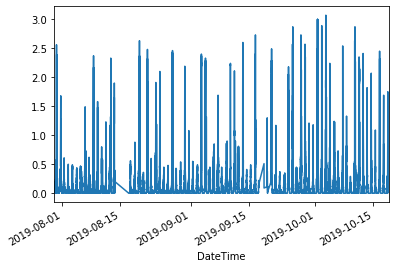

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

df_plt = df

df_plt["Current(A)"].plot()
# df_plt["Temperature sensor(°C)"].plot()
plt.show()

In [9]:
# There seem to be missing dates. Which ones?
print(df.index.min())
print(df.index.max())

ref_date_range = pd.date_range(df.index.min(), df.index.max(), freq="1min")
ref_df = pd.DataFrame(np.full((ref_date_range.shape[0], 1), 1))
ref_df.index = ref_date_range
missing_dates = ref_df[~ref_df.index.isin(df.index)]
missing_dates

2019-07-30 00:00:00
2019-10-18 17:24:00


,0
2019-08-01 07:03:00,1
2019-08-02 11:53:00,1
2019-08-02 11:55:00,1
2019-08-02 12:02:00,1
2019-08-02 12:05:00,1
...,...
2019-10-15 16:01:00,1
2019-10-15 16:02:00,1
2019-10-15 16:03:00,1
2019-10-17 17:23:00,1


In [10]:
# Make counts
missing_counts = missing_dates.resample('W').count()
missing_counts["percent"] = missing_counts[0] / (7*24*60) * 100
print(missing_counts)

               0    percent
2019-08-04    10   0.099206
2019-08-11     5   0.049603
2019-08-18  4771  47.331349
2019-08-25     4   0.039683
2019-09-01     6   0.059524
2019-09-08     3   0.029762
2019-09-15   240   2.380952
2019-09-22  3986  39.543651
2019-09-29    10   0.099206
2019-10-06     4   0.039683
2019-10-13     4   0.039683
2019-10-20     9   0.089286


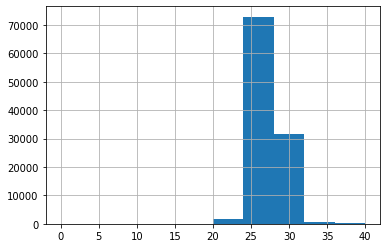

In [11]:
# We can make histograms
df_plt = df

df_plt["Temperature sensor(°C)"].hist()
plt.show()

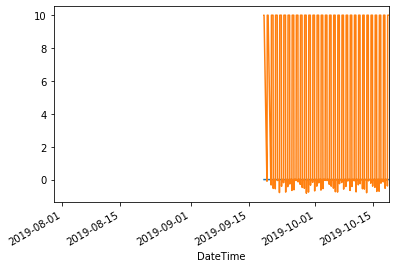

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

df_plt = df # .loc["2019-10-01"]

df_plt["Azimuth"].plot()
df_plt["Elevation"].plot()

plt.show()

In [13]:
df_azim = pd.read_csv('../data/azimuthSunAnnual_1min.csv')
df_azim

,Time,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2020-01-01
0,00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00:01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00:02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00:04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,23:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,23:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,23:57:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,23:58:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# We read the files
df_azim = pd.read_csv('../data/azimuthSunAnnual_1min.csv')
df_elev = pd.read_csv('../data/elevationSunAnnual_1min.csv')

# We transform them so that the data is also in roes
df_azim = df_azim.melt(id_vars = ["Time"], var_name = "Date", value_name = "Azimuth")
# We set a date time index so we can merge on the index
df_azim['DateTime'] = pd.to_datetime(df_azim['Date'] + ' ' + df_azim['Time'])
df_azim.set_index(["DateTime"], inplace=True)
# we drop the columns
df_azim.drop(['Time', 'Date'], axis=1, inplace=True)

# and repeat it for elevation
df_elev = df_elev.melt(id_vars = ["Time"], var_name = "Date", value_name = "Elevation")
df_elev['DateTime'] = pd.to_datetime(df_elev['Date'] + ' ' + df_elev['Time'])
df_elev.set_index(["DateTime"], inplace=True)
df_elev.drop(['Time', 'Date'], axis=1, inplace=True)

# we merge the two (I love Pandas!)
df_sun = pd.merge(df_elev, df_azim, left_index=True, right_index=True)
df_sun

# and we shift the index!
df_sun.index = df_sun.index.shift(-2, freq="h")
df_sun

,Elevation,Azimuth
DateTime,,
2018-12-31 22:00:00,0.0,0.0
2018-12-31 22:01:00,0.0,0.0
2018-12-31 22:02:00,0.0,0.0
2018-12-31 22:03:00,0.0,0.0
2018-12-31 22:04:00,0.0,0.0
...,...,...
2020-01-01 21:55:00,0.0,0.0
2020-01-01 21:56:00,0.0,0.0
2020-01-01 21:57:00,0.0,0.0


In [15]:
# We drop the old Azimuth and Elevation
df.drop(columns=["Azimuth", "Elevation"], inplace=True)

# and we merge the correct ones
df = pd.merge(df_sun, df, left_index=True, right_index=True)
df

,Elevation,Azimuth,Ambient Temp.(°C),Battery Voltage(V),Current(A),Feel-like temperature,Global radiation(W/m^2),Ground pressure(hPa),Humidity WetterOnline(RH),Humidity sensor(RH),...,Temperature WetterOnline(°C),Temperature sensor(°C),Voltage(V),Weather condition,Wind gust(Beaufort),Wind gust(km/h),Wind's cardinal direction,Wind's direction(°),Wind's speed(Beaufort),Wind's speed(m/s)
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-07-30 00:00:00,0.000,0.000,23.88,12.85,0.00,NaN,0,1011.9,85,47.9,...,18.0,28.1,0.16,md____,NaN,NaN,NaN,NaN,NaN,1.8
2019-07-30 00:01:00,0.000,0.000,23.87,12.85,0.00,NaN,0,1011.9,85,47.9,...,18.0,28.1,0.17,md____,NaN,NaN,NaN,NaN,NaN,1.8
2019-07-30 00:02:00,0.000,0.000,23.87,12.85,0.00,NaN,0,1011.9,85,47.8,...,18.0,28.1,0.17,md____,NaN,NaN,NaN,NaN,NaN,1.8
2019-07-30 00:03:00,0.000,0.000,23.84,12.85,0.00,NaN,0,1011.9,85,47.8,...,18.0,28.1,0.18,md____,NaN,NaN,NaN,NaN,NaN,1.8
2019-07-30 00:04:00,0.000,0.000,23.89,12.85,0.00,NaN,0,1011.9,85,47.8,...,18.0,28.1,0.16,md____,NaN,NaN,NaN,NaN,NaN,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-18 17:20:00,8.580,244.890,21.87,13.42,0.04,18.8,80,1012.3,70,35.6,...,18.8,26.4,14.47,wb____,3.0,14.0,so,120.0,1.0,0.5
2019-10-18 17:21:00,8.428,245.086,21.85,13.40,0.03,18.8,80,1012.3,70,35.6,...,18.8,26.4,14.46,wb____,3.0,14.0,so,120.0,1.0,0.5
2019-10-18 17:22:00,8.276,245.282,21.83,13.39,0.03,18.8,80,1012.3,70,35.7,...,18.8,26.4,14.42,wb____,3.0,14.0,so,120.0,1.0,0.5


In [16]:
# this looks better!
df[["Azimuth", "Elevation"]].describe()

,Azimuth,Elevation
count,107240.000000,107240.000000
mean,96.973705,15.250765
std,100.864677,18.302002
min,0.000000,-0.840000
25%,0.000000,0.000000
50%,89.882000,3.997000
75%,188.569000,31.046500
max,298.740000,60.230000


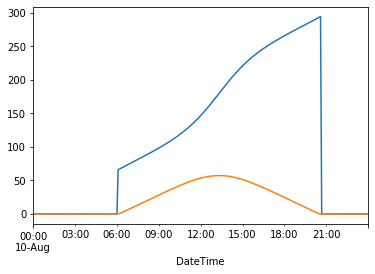

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# please wear your sunglasses, we look at the sun
df_plt = df.loc["2019-08-10"]

df_plt["Azimuth"].plot()
df_plt["Elevation"].plot()

plt.show()

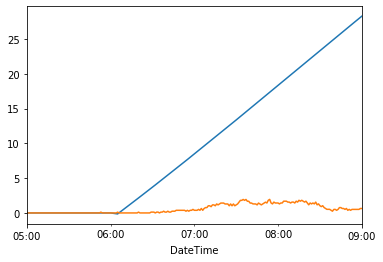

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# Elevation gives power, the higher the sun the more energy
# but we forgot to synchronize our watches!
df_plt = df.loc["2019-08-10 05:00":"2019-08-10 09:00"]
# df_plt = df.loc["2019-08-10"]
# df_plt = df.loc["2019-08-10 18:00":"2019-08-10 23:00"]

df_plt["Elevation"].plot()
df_plt["Power(W)"].plot()

plt.show()

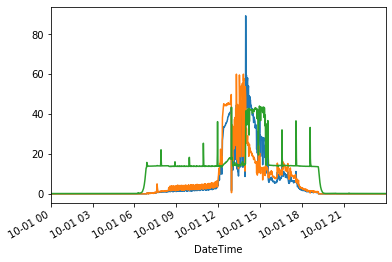

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

df_plt = df.loc["2019-10-01"].copy()
df_plt["Current(A)"] = df_plt["Current(A)"] * 20

df_plt["Power(W)"].plot()
df_plt["Current(A)"].plot()
df_plt["Voltage(V)"].plot()
plt.show()

In [20]:
df_plt = df

corr = df_plt.corr()
# corr.style.background_gradient(cmap='coolwarm')
corr["Power(W)"]

Elevation                       0.468268
Azimuth                         0.361974
Ambient Temp.(°C)              -0.027890
Battery Voltage(V)              0.441527
Current(A)                      0.895664
Feel-like temperature           0.251102
Global radiation(W/m^2)         0.503442
Ground pressure(hPa)            0.029949
Humidity WetterOnline(RH)      -0.400413
Humidity sensor(RH)            -0.156324
Light Int.(lux)                 0.333998
Power(W)                        1.000000
Rainfall's possibility(%)      -0.138566
Rainfall(mm)                   -0.044620
Temperature WetterOnline(°C)    0.235351
Temperature sensor(°C)          0.071834
Voltage(V)                      0.393430
Wind gust(Beaufort)             0.120699
Wind gust(km/h)                 0.106934
Wind's direction(°)            -0.037838
Wind's speed(Beaufort)          0.050010
Wind's speed(m/s)               0.059505
Name: Power(W), dtype: float64

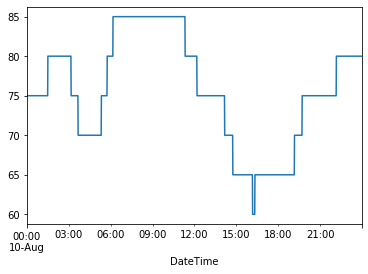

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

df_plt = df.loc["2019-08-10"]

df_plt["Humidity WetterOnline(RH)"].plot()

plt.show()

In [22]:
df_plt = df[["Elevation", "Global radiation(W/m^2)", "Humidity WetterOnline(RH)", "Temperature WetterOnline(°C)", "Power(W)"]]

corr = df_plt.corr()
corr.style.background_gradient(cmap='coolwarm')

,Elevation,Global radiation(W/m^2),Humidity WetterOnline(RH),Temperature WetterOnline(°C),Power(W)
Elevation,1,0.816608,-0.530513,0.470989,0.468268
Global radiation(W/m^2),0.816608,1,-0.647926,0.539826,0.503442
Humidity WetterOnline(RH),-0.530513,-0.647926,1,-0.601708,-0.400413
Temperature WetterOnline(°C),0.470989,0.539826,-0.601708,1,0.235351
Power(W),0.468268,0.503442,-0.400413,0.235351,1


In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df[["Elevation", "Global radiation(W/m^2)", "Humidity WetterOnline(RH)", "Temperature WetterOnline(°C)"]]
y = df[["Power(W)"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(X.columns)
print(regressor.coef_)

y_pred = regressor.predict(X_test)

print('Mean Power(W):', y_test.mean())  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Index(['Elevation', 'Global radiation(W/m^2)', 'Humidity WetterOnline(RH)',
       'Temperature WetterOnline(°C)'],
      dtype='object')
[[ 0.07205735  0.00910721 -0.0811434  -0.16386107]]
Mean Power(W): Power(W)    2.918681
dtype: float64
Mean Absolute Error: 2.610401322472342
Mean Squared Error: 37.49227267155638
Root Mean Squared Error: 6.123093390726323


In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X = df[["Elevation", "Global radiation(W/m^2)", "Humidity WetterOnline(RH)", "Temperature WetterOnline(°C)"]]
y = df[["Power(W)"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=100)  
regressor.fit(X_train, y_train.values.ravel())

print(X.columns)
print(regressor.feature_importances_)

y_pred = regressor.predict(X_test)

print('Mean Power(W):', y_test.mean())  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Index(['Elevation', 'Global radiation(W/m^2)', 'Humidity WetterOnline(RH)',
       'Temperature WetterOnline(°C)'],
      dtype='object')
[0.40831748 0.23053546 0.1409092  0.22023786]
Mean Power(W): Power(W)    2.918681
dtype: float64
Mean Absolute Error: 0.31550807874791453
Mean Squared Error: 2.5012320898587097
Root Mean Squared Error: 1.5815284031147558
